In [975]:
# import pandas
import pandas as pd

In [976]:
# for visualize
import seaborn as sns

In [977]:
#read the data
df = pd.read_csv('/Users/liu/Desktop/MBAN6110/sales_data.csv')

In [978]:
df

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


In [979]:
#get a summary of the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [ ]:
## From the outcome we can find that

In [980]:
# get a descride of the DataFrame
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


In [981]:
df['Sale Date'] = pd.to_datetime(df['Sale Date'])
df.info()
#Change the datatype of Sale Date from object to datetime(Will be used in doing the graph of the monthly and quarterly sales trends)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Product     947 non-null    object        
 1   Region      946 non-null    object        
 2   Price       945 non-null    float64       
 3   Units Sold  946 non-null    float64       
 4   Sale Date   1050 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 41.1+ KB


In [982]:
#drop duplicates
df.drop_duplicates()

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
995,NaN,Region_7,31.83,13.0,2024-09-22
996,Product_36,NaN,46.19,9.0,2024-09-23
997,NaN,Region_7,311.80,13.0,2024-09-24
998,Product_2,Region_10,43.44,15.0,2024-09-25


In [983]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Product     947 non-null    object        
 1   Region      946 non-null    object        
 2   Price       945 non-null    float64       
 3   Units Sold  946 non-null    float64       
 4   Sale Date   1050 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 41.1+ KB


In [984]:
#Replace Missing Values
df['Product'] = df['Product'].fillna('Other')

In [985]:
df['Region'] = df['Region'].fillna("Other")

In [986]:
df['Price'] = df['Price'].fillna(df['Price'].mean())

In [987]:
df['Units Sold'] = df['Units Sold'].fillna(df['Units Sold'].mean())


In [988]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Product     1050 non-null   object        
 1   Region      1050 non-null   object        
 2   Price       1050 non-null   float64       
 3   Units Sold  1050 non-null   float64       
 4   Sale Date   1050 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 41.1+ KB


<Axes: xlabel='Units Sold', ylabel='Count'>

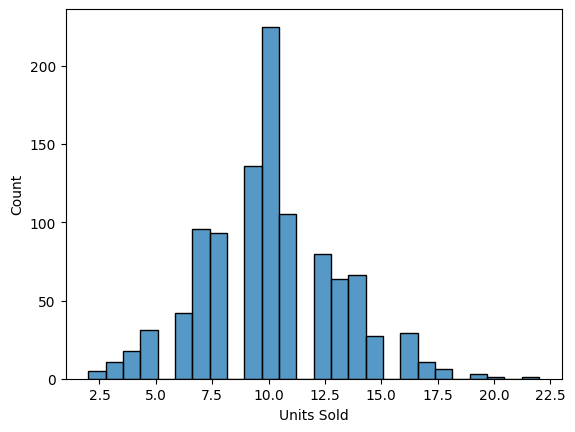

In [989]:
sns.histplot(df['Units Sold'])

<Axes: >

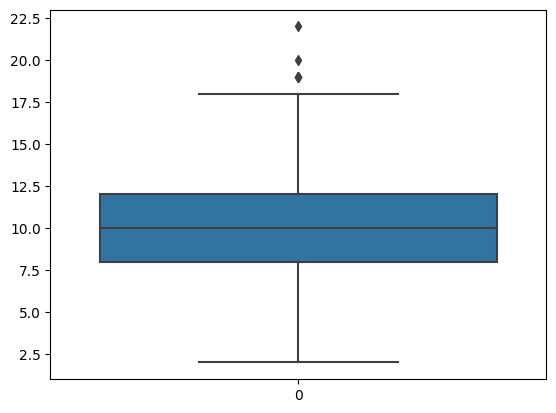

In [990]:
#Find the outliner
sns.boxplot(df['Units Sold'])

In [991]:
# filter the data set and identity the outlier
df[df['Units Sold'] > 18] 

,Product,Region,Price,Units Sold,Sale Date
221,Product_5,Region_5,50.360000,20.0,2022-08-10
232,Product_14,Region_3,104.270000,19.0,2022-08-21
719,Product_50,Region_4,86.730000,22.0,2023-12-21
912,Product_22,Region_8,107.598688,19.0,2024-07-01
962,Product_13,Region_7,0.610000,19.0,2024-08-20


In [992]:
#drop outliers
drop_index = [221,232,719,912,962]
df.drop(drop_index, axis =0, inplace = True)

<Axes: >

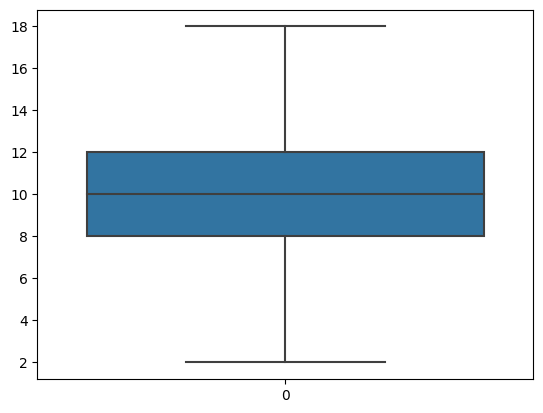

In [993]:
sns.boxplot(df['Units Sold'])

In [994]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Product     1045 non-null   object        
 1   Region      1045 non-null   object        
 2   Price       1045 non-null   float64       
 3   Units Sold  1045 non-null   float64       
 4   Sale Date   1045 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 81.3+ KB


In [995]:
df.describe()

,Price,Units Sold,Sale Date
count,1045.000000,1045.000000,1045
mean,107.778999,10.001968,2023-05-17 08:11:56.555023872
min,0.200000,2.000000,2022-01-01 00:00:00
25%,33.850000,8.000000,2022-09-12 00:00:00
50%,88.450000,10.000000,2023-05-17 00:00:00
75%,133.350000,12.000000,2024-01-22 00:00:00
max,2143.300000,18.000000,2024-09-26 00:00:00
std,117.869411,2.940216,NaN


In [996]:
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,1045,1045,1045.000000,1045.000000,1045
unique,51,11,NaN,NaN,NaN
top,Other,Region_9,NaN,NaN,NaN
freq,103,109,NaN,NaN,NaN
mean,NaN,NaN,107.778999,10.001968,2023-05-17 08:11:56.555023872
min,NaN,NaN,0.200000,2.000000,2022-01-01 00:00:00
25%,NaN,NaN,33.850000,8.000000,2022-09-12 00:00:00
50%,NaN,NaN,88.450000,10.000000,2023-05-17 00:00:00
75%,NaN,NaN,133.350000,12.000000,2024-01-22 00:00:00
max,NaN,NaN,2143.300000,18.000000,2024-09-26 00:00:00


In [997]:
df

,Product,Region,Price,Units Sold,Sale Date
0,Other,Region_6,75.960000,10.0,2022-01-01
1,Other,Region_1,175.780000,8.0,2022-01-02
2,Product_46,Region_3,20.430000,12.0,2022-01-03
3,Product_36,Region_1,12.770000,10.0,2022-01-04
4,Product_17,Region_6,125.690000,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.690000,8.0,2022-07-28
1046,Product_1,Region_6,107.598688,8.0,2022-08-02
1047,Product_17,Region_2,114.370000,11.0,2023-12-18
1048,Other,Region_8,107.598688,5.0,2023-12-27


<Axes: xlabel='Region', ylabel='Units Sold'>

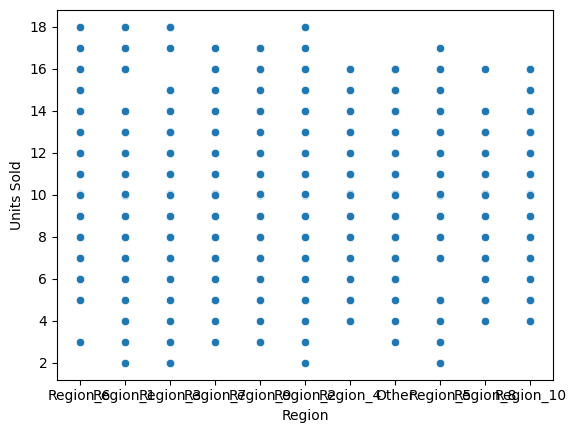

In [998]:
# Sales performance in different regions
sns.scatterplot(x="Region", y="Units Sold", data = df)

<Axes: xlabel='Region', ylabel='Units Sold'>

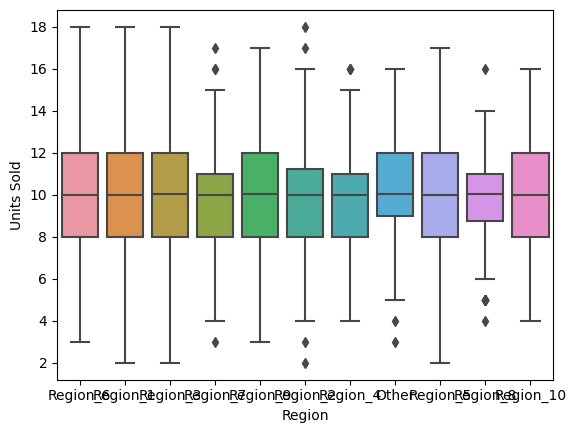

In [999]:
#boxplot of all products's units sold in different regions
sns.boxplot(x="Region", y="Units Sold", data = df)

In [1000]:
##The X axis are: Region_1,Region_2, Region_3, Region_4, Region_5,Region_6,Region_7,Region_8,Region_9,Region_10

In [1001]:
df.groupby('Region')['Units Sold'].aggregate(['mean','min','max','median',"sum"]).sort_values('sum',ascending =False)


,mean,min,max,median,sum
Region,,,,,
Region_9,10.179665,3.0,17.0,10.048626,1109.583510
Region_10,10.152651,4.0,16.0,10.000000,1096.486258
Other,10.083469,3.0,16.0,10.048626,1048.680761
Region_4,9.772918,4.0,16.0,10.000000,977.291755
Region_3,10.119884,2.0,18.0,10.048626,961.389006
Region_6,10.111710,3.0,18.0,10.000000,940.389006
Region_8,9.757091,4.0,16.0,10.024313,936.680761
Region_5,9.983723,2.0,17.0,10.000000,928.486258
Region_1,10.142927,2.0,18.0,10.000000,872.291755


<Axes: xlabel='Product', ylabel='Units Sold'>

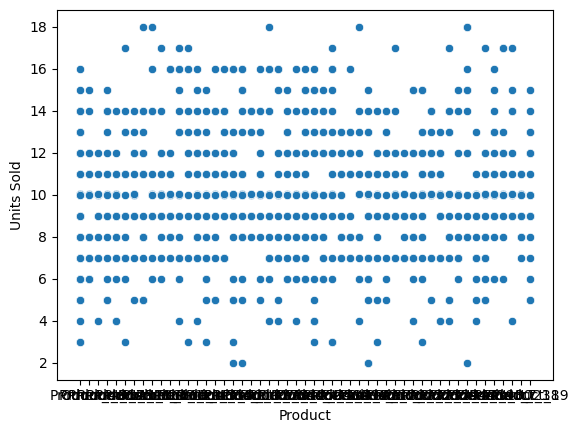

In [1002]:
# Sales performance in different products
sns.scatterplot(x="Product", y="Units Sold", data = df)

<Axes: xlabel='Product', ylabel='Units Sold'>

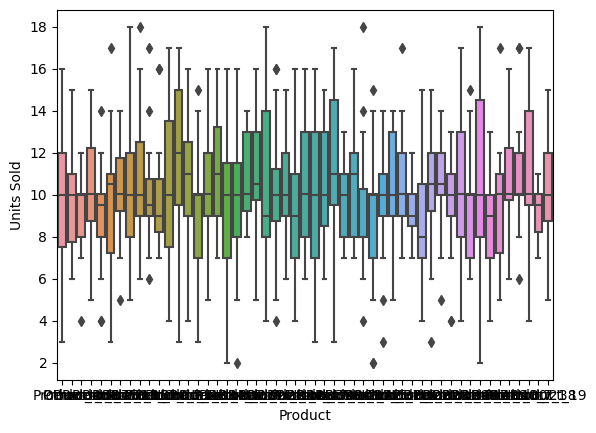

In [1003]:
sns.boxplot(x="Product", y="Units Sold", data = df)

In [1004]:

df.groupby('Product')['Units Sold'].aggregate(['mean','min','max','median',"sum"]).sort_values('sum',ascending= False)

,mean,min,max,median,sum
Product,,,,,
Other,9.703278,3.0,16.0,10.000000,999.437632
Product_30,10.843464,6.0,16.0,10.048626,260.243129
Product_1,9.809563,7.0,16.0,9.000000,255.048626
Product_45,9.047871,4.0,14.0,9.500000,253.340381
Product_33,9.149949,3.0,15.0,10.000000,247.048626
Product_43,10.654288,4.0,16.0,11.000000,245.048626
Product_4,10.567332,6.0,16.0,10.048626,243.048626
Product_13,10.087385,2.0,16.0,10.000000,242.097252
Product_48,10.521739,6.0,15.0,10.000000,242.000000


In [1005]:
#add monthly and quarterly sales columns
df['Sale Date'] = pd.to_datetime(df['Sale Date'])
df = df.set_index('Sale Date')
df_monthly_sales = df['Units Sold'].resample('M').sum()
df_quarterly_sales = df['Units Sold'].resample('Q').sum()


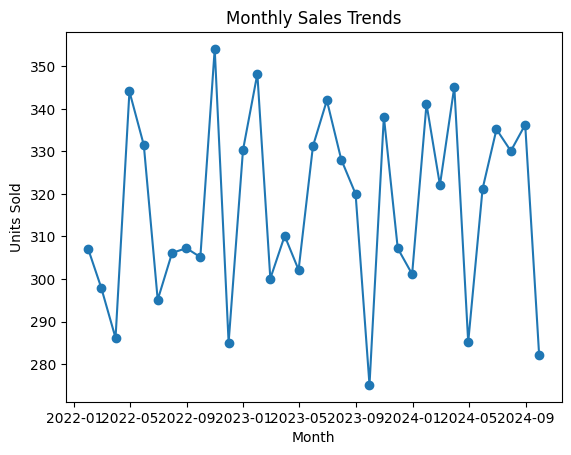

In [1006]:
#import plt and show the trend of monthly sales of the total products
import matplotlib.pyplot as plt
plt.plot(df_monthly_sales, marker='o')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.title('Monthly Sales Trends')
plt.show()


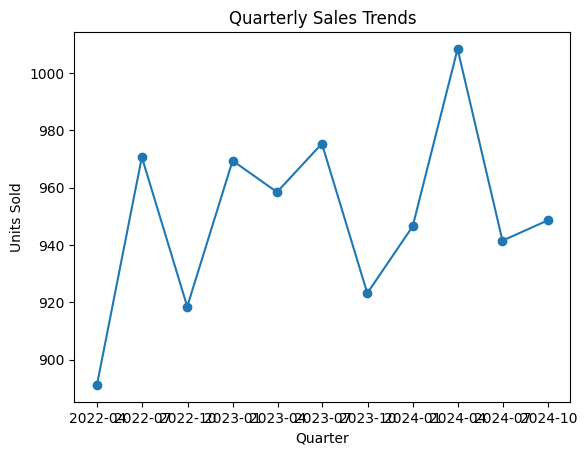

In [1007]:
#show the trend of quarterly sales of the total products
plt.plot(df_quarterly_sales, marker='o')
plt.xlabel('Quarter')
plt.ylabel('Units Sold')
plt.title('Quarterly Sales Trends')
plt.show()